In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

In [5]:
boston_data = load_boston()

In [6]:
def load_boston_data():
    df = pd.DataFrame(boston_data.data)
    df.columns = boston_data.feature_names
    df['PRICE'] = boston_data.target
    return df

In [7]:
def split_dataset(X, y):
    # scale data to reduce risk of runtime time error
    scalerx = StandardScaler()
    scalery = StandardScaler()
    X_scaled = scalerx.fit_transform(X)
    y_scaled = scalery.fit_transform(y)

    # split dataset into train and test
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled)
    return X_train, X_test, y_train, y_test

In [30]:
#create linear regression model
class MyLinearRegression:
    def __init__(self, eta, iter) -> None:
        self.eta = eta
        self.iter = iter

    def fitting_line(self, X, y):
        # define total size
        self.n_features = X.shape[1] if len(X.shape) > 1 else 1 
        train_size = len(X)

        # normalize the format of dimension of dataset but keep it fit with the original dim
        X = X.reshape(-1, self.n_features)
        y = y.reshape([-1, 1])

        # add bias to X
        one = np.ones([train_size, 1])
        X = np.concatenate([X, one], 1)
        
        # create initial weight
        self.weight = np.zeros([self.n_features + 1, 1])

        # print training infor:
        print('x shape: ', X.shape)
        print('y shape: ', y.shape)
        print('weight shape: ', self.weight.shape)
        print('train_size: ', train_size)
        
        # save all loss in one list
        self.train_loss = []
        
        # training
        for i in range(self.iter):
            loss =  (0.5 / self.n_features) * np.linalg.norm((y - np.dot(X, self.weight))) ** 2
            gradient = (1 / self.n_features) * np.dot(X.T, ( np.dot(X, self.weight) - y))
            
            # update weight
            self.weight = self.weight - (self.eta / train_size) * gradient
            
            # calculate average loss
            loss = loss / train_size
            self.train_loss.append(loss.item())
    def predict(self, X):
        #normalization
        X = X.reshape(-1, self.n_features)
        
        # add bias
        one = np.ones([len(X), 1])
        X = np.concatenate([X, one], 1)
        
        # dot product to calculate y_hat
        y_hat = np.dot(X, self.weight)
        return y_hat

    def get_train_loss(self):
        return self.train_loss

    def get_weight(self):
        return self.weight

    def PrintMe(self):
        print(f"Weights found after {self.iter} epoch:\n ", self.weight)
        print("Loss = ", self.train_loss[-1])
        print("\n")
    
    def DrawingLosses(self):
        print("drawing loss function: ")
        plt.plot(self.train_loss)
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.show()
    

In [31]:
def Model1():
    print("Testing with 1 column RM --- Model 1")
    print("-------------------------------------")
    # testing with one column
    # choose RM because it is linear

    X = boston_data.data[:, 5, np.newaxis] 
    y = boston_data.target[:, np.newaxis]
    X_train, X_test, y_train, y_test = split_dataset(X, y)
    
    # test split_dataset function
    print(X_train.shape)
    print(X_test.shape)
    print(y_train.shape)
    print(y_test.shape)

    # training using GD
    model1 = MyLinearRegression(0.1, 1000)
    model1.fitting_line(X_train, y_train)
    
    # display result:
    model1.PrintMe()

    # recheck with sklearn library  
    CheckingModel(X_train, y_train, X_test, y_test)

    # drawing losses
    model1.DrawingLosses()

In [32]:
def Model2():
    print("Testing with multiple columns --- Model 2")
    print("------------------------------------------")
    # testing on multivariable function
    # many columns
    df = load_boston_data()
    features = df.drop('PRICE', axis = 1)
    target = df['PRICE']
    # change to numpy array
    X = features.to_numpy().reshape(len(features), len(features.columns))
    y = target.to_numpy().reshape(target.shape[0], 1)
    X_train, X_test, y_train, y_test = split_dataset(X, y)

    # test split_dataset function
    print("train set and test set size: ")
    print(X_train.shape)
    print(X_test.shape)
    print(y_train.shape)
    print(y_test.shape)

    # training
    model2 = MyLinearRegression(0.1, 1000)
    model2.fitting_line(X_train, y_train)

    # display result
    model2.PrintMe()

    # recheck with sklearn library  
    CheckingModel(X_train, y_train, X_test, y_test)

    # drawing losses
    model2.DrawingLosses()

In [33]:
def CheckingModel(X_train, y_train, X_test, y_test):
    print("****** recheck with Sklearn: ")
    test_model = LinearRegression()
    test_model.fit(X_train, y_train)
    y_hat = test_model.predict(X_test)
    mse = mean_squared_error(y_hat, y_test)
    print("Weights: ", test_model.coef_, test_model.intercept_)
    print("Loss = ", mse)

In [34]:
def main():
    Model1()
    #Model2()
    #Sklearn_Recheck()

Testing with 1 column RM --- Model 1
-------------------------------------
(379, 1)
(127, 1)
(379, 1)
(127, 1)
x shape:  (379, 2)
y shape:  (379, 1)
weight shape:  (2, 1)
train_size:  379
Weights found after 1000 epoch:
  [[ 0.73247912]
 [-0.00389594]]
Loss =  0.23312130961408592


****** recheck with Sklearn: 
Weights:  [[0.73247912]] [-0.00389594]
Loss =  0.6719293735060194
drawing loss function: 


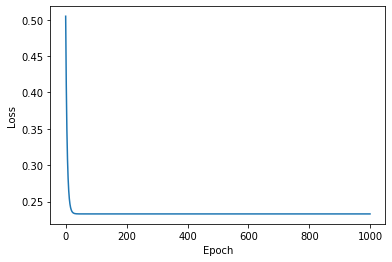

In [35]:
if __name__ == "__main__":
    main()
